# Multi-Label Classification
### Random Forest Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import sklearn
from sklearn import metrics, model_selection, tree
from sklearn.preprocessing import MinMaxScaler

#### Carga de data sets
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

In [2]:
# Train data
X_train = pd.read_csv('x_train_smote_undersample.csv').to_numpy()
y_train = pd.read_csv('y_train_smote_undersample.csv')
y_train = y_train['LABEL']

# Test data
X_test = pd.read_csv('x_test_smote_undersample.csv').to_numpy()
y_test = pd.read_csv('y_test_smote_undersample.csv')
y_test = y_test['LABEL']

# Validation data
X_validation = pd.read_csv('x_validation_smote_undersample.csv').to_numpy()
y_validation = pd.read_csv('y_validation_smote_undersample.csv')
y_validation = y_validation['LABEL']

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
clf = RandomForestClassifier(max_depth=3, random_state=6, n_jobs=10, n_estimators=100)

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=10, random_state=6)

In [6]:
predictions = clf.predict(X_test)

In [7]:
clf.score(X_test, y_test)

0.9889548994747328

In [8]:
print(metrics.accuracy_score(y_test, predictions))
print('Matriz de confusion Random Forest Classifier\n', metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions, target_names=['0', '1', '2', '3']))

0.9889548994747328
Matriz de confusion Random Forest Classifier
 [[293060   1507   2051     11]
 [   107 112712      0      0]
 [     1      0 103439      0]
 [     0      0   2421  36791]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    296629
           1       0.99      1.00      0.99    112819
           2       0.96      1.00      0.98    103440
           3       1.00      0.94      0.97     39212

    accuracy                           0.99    552100
   macro avg       0.99      0.98      0.98    552100
weighted avg       0.99      0.99      0.99    552100



In [10]:
import joblib

In [11]:
joblib.dump(clf, 'modelo2.h5')

['modelo2.h5']

## Grafica ROC
Extraído de: https://laurenliz22.github.io/roc_curve_multiclass_predictions_random_forest_classifier

In [21]:
#Calculate the y_score
y_score = clf.predict_proba(X_test)

In [23]:
#Binarize the output
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

AUC for Class 1: 0.9990258518076823
AUC for Class 2: 0.9999434497518022
AUC for Class 3: 0.9999912472886091
AUC for Class 4: 0.9999953310477199


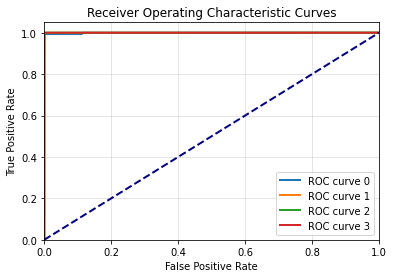

In [32]:
from sklearn import metrics
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve %i' % (i))
  print('AUC for Class {}: {}'.format(i+1, metrics.auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="best")
plt.grid(alpha=.4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

## Cross Validation
Fuente de consulta> https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from statistics import mean

In [36]:
rf_cv_score=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=5)
print(rf_cv_score)

[0.98897384 0.98879015 0.99002135 0.9888249  0.98982272]


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [44]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.990 (0.002)


In [41]:
kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=None) 

for train_index, test_index in kf.split(X_train):
      print("Train:", train_index, "Validation:",test_index)
      x_train, x_test = X_train[train_index], X_train[test_index] 
      Y_train, Y_test = y_train[train_index], y_train[test_index]

Train: [      0       1       4 ... 1007146 1007147 1007148] Validation: [      2       3      15 ... 1007105 1007116 1007143]
Train: [      0       1       2 ... 1007145 1007146 1007148] Validation: [      5       7      12 ... 1007138 1007144 1007147]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [      8      18      28 ... 1007134 1007135 1007141]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [      9      10      30 ... 1007129 1007132 1007136]
Train: [      2       3       4 ... 1007145 1007147 1007148] Validation: [      0       1      13 ... 1007114 1007133 1007146]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [      6      11      20 ... 1007099 1007119 1007130]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     17      24      27 ... 1007125 1007137 1007145]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     43      63      66 ... 1007131 1

In [42]:
kf = KFold(n_splits=10)
for train, test in kf.split(X_train):
    print("%s %s" % (train, test))

[ 100715  100716  100717 ... 1007146 1007147 1007148] [     0      1      2 ... 100712 100713 100714]
[      0       1       2 ... 1007146 1007147 1007148] [100715 100716 100717 ... 201427 201428 201429]
[      0       1       2 ... 1007146 1007147 1007148] [201430 201431 201432 ... 302142 302143 302144]
[      0       1       2 ... 1007146 1007147 1007148] [302145 302146 302147 ... 402857 402858 402859]
[      0       1       2 ... 1007146 1007147 1007148] [402860 402861 402862 ... 503572 503573 503574]
[      0       1       2 ... 1007146 1007147 1007148] [503575 503576 503577 ... 604287 604288 604289]
[      0       1       2 ... 1007146 1007147 1007148] [604290 604291 604292 ... 705002 705003 705004]
[      0       1       2 ... 1007146 1007147 1007148] [705005 705006 705007 ... 805717 805718 805719]
[      0       1       2 ... 1007146 1007147 1007148] [805720 805721 805722 ... 906432 906433 906434]
[     0      1      2 ... 906432 906433 906434] [ 906435  906436  906437 ... 10071